In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from fitness_mcmc import *


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
N = 100
num_gens = 49
dt = 0.1
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([7, 14, 28, 42, 49])

traj = create_trajectories(f0_vals, s_vals, times)

In [3]:
fitness_model = Fitness_Model(traj)
fitness_model.find_MAP()

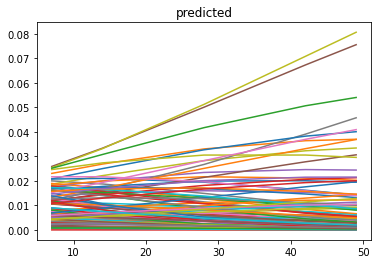

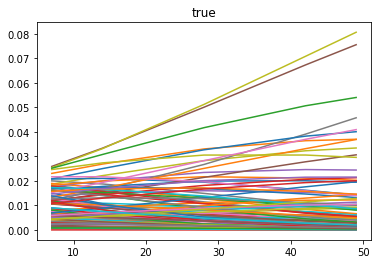

In [4]:
f_pred = fitness_model.map_estimate["f0"] * np.exp(fitness_model.map_estimate["s"] * times)
f_pred /= np.sum(f_pred, axis = 0)

plt.figure()
plt.plot(times, f_pred.T)
plt.title("predicted")

plt.figure()
plt.plot(times, traj.T)
plt.title("true")
plt.show()